In [40]:
import os
import numpy as np
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
%matplotlib inline

In [41]:
data = pd.read_csv("smoke_detection_iot.csv", delimiter=",")
data

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


       Humidity[%]  TVOC[ppb]  eCO2[ppm]  Raw H2  Raw Ethanol  Pressure[hPa]  \
0            57.36          0        400   12306        18520        939.735   
1            56.67          0        400   12345        18651        939.744   
2            55.96          0        400   12374        18764        939.738   
3            55.28          0        400   12390        18849        939.736   
4            54.69          0        400   12403        18921        939.744   
...            ...        ...        ...     ...          ...            ...   
62496        13.73       1297        400   13674        20336        936.674   
62497        13.72       1318        400   13668        20338        936.671   
62498        13.73       1341        400   13675        20338        936.670   
62499        13.70       1302        400   13659        20335        936.689   
62500        13.70       1373        400   13663        20323        936.685   

       PM1.0  PM2.5  NC0.5  NC1.0  NC2.

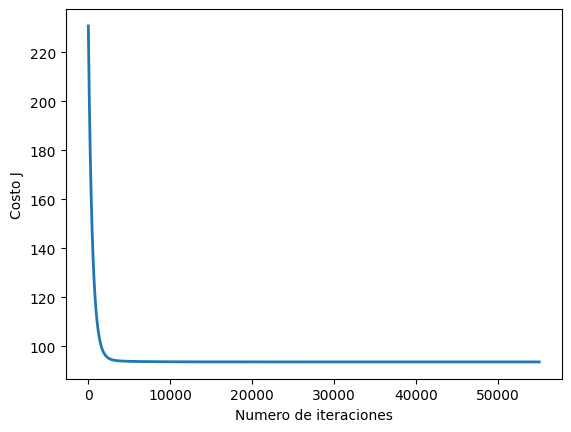

In [ ]:
# Empezando con el modelo de regresión lineal multivariable
'''
Este código implementa un modelo de regresión lineal multivariable para predecir la temperatura (Temperature[C]) 
a partir de varias características ambientales como Humidity[%], NC2.5 y otras. Primero, se seleccionan las primeras 62,501 filas del dataset, 
donde X contiene las variables independientes y y la variable objetivo, que es la temperatura. A continuación, las características se normalizan 
para que cada columna tenga media 0 y desviación estándar 1, lo que permite que el descenso por gradiente funcione de manera más eficiente. 
Luego, se agrega una columna de unos al inicio de X para representar el término independiente o intercepto del modelo. Se define una función 
de costo que calcula el error cuadrático medio para evaluar qué tan bien se ajusta el modelo y se implementa el descenso por gradiente, actualizando 
iterativamente los parámetros theta para minimizar dicho costo, usando una tasa de aprendizaje alpha y un número definido de iteraciones num_iters. 
Se grafica la evolución del costo a lo largo de las iteraciones para verificar la convergencia del modelo. 
Finalmente, se realiza la predicción en un conjunto de prueba, seleccionando filas específicas, normalizando sus características 
con los mismos parámetros de media y desviación estándar del entrenamiento, agregando la columna de unos, y calculando la temperatura 
predicha mediante la multiplicación de los parámetros theta por los valores de las características. Para cada fila de prueba se imprime la 
temperatura real y la predicha, permitiendo comparar el desempeño del modelo.
'''
X, y = data.iloc[:62501, 3:14], data.iloc[:62501, 2]
m = y.size


def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

X_norm, mu, sigma = featureNormalize(X)

print(X)
# print('Media calculada:', mu)
# print('Desviación estandar calculada:', sigma)
# print(X_norm)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

def computeCostMulti(X, y, theta):
    m = y.shape[0]
    J = 0
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

alpha = 0.001
num_iters = 55000
theta = np.zeros(X.shape[1])  # X.shape[1] = 12
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))


# Definir el rango de filas de prueba
start_test = 62502  # primera fila de prueba
end_test = 62629    # última fila de prueba

for i in range(start_test, end_test + 1):  # +1 porque Python excluye el final
    # Seleccionar las features de la fila i
    X_array = data.loc[i, 'Humidity[%]':'NC2.5']
    
    # Normalizar usando mu y sigma del entrenamiento
    X_array = (X_array - mu) / sigma
    
    # Agregar columna de unos para el intercepto
    X_array = np.insert(X_array, 0, 1)
    
    # Calcular la predicción
    temperatura = np.dot(X_array, theta)
    
    # Imprimir el resultado
    print(f"Fila {i}: temperatura real = {data.loc[i, 'Temperature[C]']}, predicha = {temperatura:.2f}")
    


In [ ]:
#Ecuacion de la normal
'''
Este código implementa la ecuación normal para calcular los parámetros de un modelo de regresión lineal multivariable. 
La ecuación normal se deriva de la minimización de la función de costo y permite obtener los parámetros óptimos de 
manera analítica, sin necesidad de realizar un proceso iterativo como el descenso por gradiente. 
'''
X, y = data.iloc[:62501, 3:14], data.iloc[:62501, 2]
m = y.size
print(m)
X = np.concatenate([np.ones((m, 1)), X], axis=1)

def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y)

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)))

X_array = data.loc[62629, 'Humidity[%]':'NC2.5'].values
X_array = np.insert(X_array, 0, 1)  # Intercepto

# Predicción
temperatura = np.dot(X_array, theta)
print(f"Temperatura predicha: {temperatura:.2f}")


62501
Theta calculado a partir de la ecuación de la normal: [ 1.35455302e+03 -3.92725090e-01 -2.65790071e-04 -6.25682367e-04
 -7.93452363e-03 -2.18524731e-03 -1.24929522e+00 -2.64139092e+00
 -4.24489183e-01 -3.35701043e+00  2.52888693e+01 -3.94092971e+01]
Temperatura predicha: 23.85


Después: (62501, 77)
theta: [ 9.11165367e-02 -3.11982621e-01  1.51948454e+00  7.86595301e-01
 -1.38376274e+00  1.06843851e-02  2.05065317e-01  7.06104164e-01
  1.64782189e-01  8.14459151e-01  4.79996840e-01  3.33116234e-03
  2.49464098e-05 -2.28867051e-05  9.83930963e-05  1.49838785e-04
 -5.44598801e-03 -2.77104106e+00 -3.80794423e+00  4.50348548e-01
  3.35880372e+00  9.50219471e-01  5.39415670e-09  2.32674089e-07
  1.59803018e-06 -1.69360313e-07  3.13543228e-04 -3.74702373e-03
 -1.43756353e-03  1.61453089e-03 -5.75846243e-03  1.27550310e-02
 -4.92003013e-08 -6.29520665e-06  2.47246800e-06 -1.60559482e-03
  8.56162247e-03  8.72177053e-03 -2.29608318e-03 -1.39757522e-03
 -1.32063655e-02 -3.62900987e-05  6.19785948e-05 -1.18520261e-03
  5.18424760e-04  1.78475015e-01  3.64586085e-02 -4.16619437e-01
  4.23809433e-01 -1.52644189e-05  1.26322276e-03 -1.26172151e-02
 -5.31569840e-02 -3.56593927e-03  8.74846687e-02 -6.22540323e-02
 -6.23965657e-03  4.05212999e-01 -1.15478721e+00 -4.56972568e-

C:\Users\joelp\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\joelp\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\joelp\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\joelp\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\joelp\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid featu

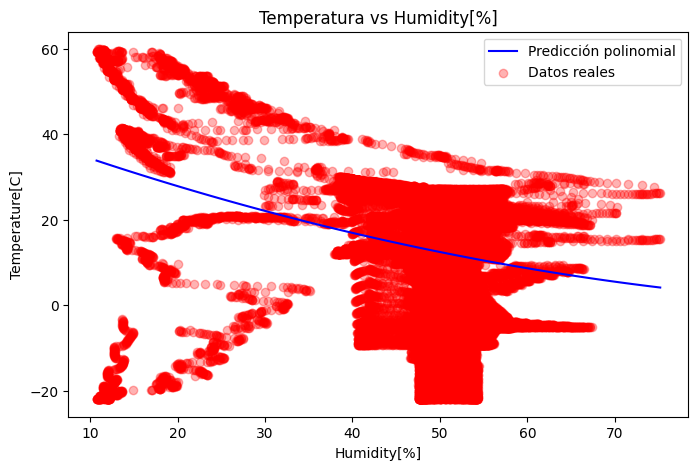

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

#modelo de polinomios
X, y = data.iloc[:62501, 3:14], data.iloc[:62501, 2]
m = y.size

pf = PolynomialFeatures(degree=2, include_bias=False)  
X_poly = pf.fit_transform(X)

print("Después:", X_poly.shape)

# Ajustamos el modelo
regresion_lineal = LinearRegression()
regresion_lineal.fit(X_poly, y)

# Mostramos parámetros
print("theta:", regresion_lineal.coef_)
print("b:", regresion_lineal.intercept_)


prediccion_entrenamiento = regresion_lineal.predict(X_poly)
# Métricas
mse = mean_squared_error(y_true=y, y_pred=prediccion_entrenamiento)
rmse = np.sqrt(mse)
r2 = regresion_lineal.score(X_poly, y)
print("Error Cuadrático Medio (MSE) =", mse)
print("Raíz del Error Cuadrático Medio (RMSE) =", rmse)
print("Coeficiente de Determinación R2 =", r2)

# Elegimos la columna de interés
feature_name = 'Humidity[%]'
feature_index = X.columns.get_loc(feature_name)  # índice en X original (sin el 1 extra)

X_avg = np.mean(X, axis=0)  # promedio de todas las columnas originales
humidity_vals = np.linspace(data['Humidity[%]'].min(), data['Humidity[%]'].max(), 100)


y_pred_plot = []

for h in humidity_vals:
    x_input = X_avg.copy()
    x_input.iloc[X.columns.get_loc('Humidity[%]')] = h
    # Transformamos con PolynomialFeatures
    x_input_poly = pf.transform([x_input])
    y_pred_plot.append(regresion_lineal.predict(x_input_poly)[0])


# Graficar
plt.figure(figsize=(8,5))
plt.plot(humidity_vals, y_pred_plot, 'b-', label='Predicción polinomial')
plt.scatter(data['Humidity[%]'][:62501], y, color='r', alpha=0.3, label='Datos reales')
plt.xlabel('Humidity[%]')
plt.ylabel('Temperature[C]')
plt.title('Temperatura vs Humidity[%]')
plt.legend()
plt.show()

In [68]:
X_test = data.iloc[62501:62630, 3:14].values  # mismas columnas que en X
y_test = data.iloc[62501:62630, 2].values    # valores reales

# Transformamos a polinomial usando el mismo PolynomialFeatures que el entrenamiento
X_test_poly = pf.transform(X_test)  # pf = PolynomialFeatures usado en entrenamiento

# Predecimos
prediccion_test = regresion_lineal.predict(X_test_poly)

# Mostramos
for i, pred in enumerate(prediccion_test, start=62501):
    print(f"Fila {i}: temperatura real = {y_test[i-62501]}, predicha = {pred:.2f}")

Fila 62501: temperatura real = -3.187, predicha = 20.14
Fila 62502: temperatura real = -3.05, predicha = 21.62
Fila 62503: temperatura real = -2.912, predicha = 21.26
Fila 62504: temperatura real = -2.774, predicha = 20.09
Fila 62505: temperatura real = -2.635, predicha = 20.97
Fila 62506: temperatura real = -2.496, predicha = 20.31
Fila 62507: temperatura real = -2.356, predicha = 22.02
Fila 62508: temperatura real = -2.215, predicha = 21.21
Fila 62509: temperatura real = -2.074, predicha = 22.16
Fila 62510: temperatura real = -1.932, predicha = 21.85
Fila 62511: temperatura real = -1.79, predicha = 22.09
Fila 62512: temperatura real = -1.647, predicha = 21.64
Fila 62513: temperatura real = -1.503, predicha = 21.28
Fila 62514: temperatura real = -1.359, predicha = 21.48
Fila 62515: temperatura real = -1.214, predicha = 20.23
Fila 62516: temperatura real = -1.069, predicha = 20.19
Fila 62517: temperatura real = -0.923, predicha = 19.91
Fila 62518: temperatura real = -0.777, predicha = 

C:\Users\joelp\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
